In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

from utils import preprocess_data

In [411]:
old_results = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/hunting_analysis/final_results/cross_val_results_all_metrics.csv')
new_results = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/cross_val_results_all_metrics.csv')

In [415]:
block = 'group'
old_results[(old_results['block_type'] == block) & (old_results['model_name'].str.startswith('dummy')) & (~old_results['metric'].str.contains('mean'))]

,metric,mean,standard_deviation,model_name,dataset,date,num_folds,block_type,spatial_spacing,group_col
0,balanced_accuracy_DI-0.05,0.250000,0.000000,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:17,5,group,NaN,species
3,median_absolute_error-inf,0.405460,0.040245,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:17,5,group,NaN,species
4,median_absolute_error-1,0.282630,0.040441,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:17,5,group,NaN,species
6,median_absolute_percentage_error-0,0.438571,0.038199,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:17,5,group,NaN,species
7,wasserstein_distance-2,0.395646,0.012205,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:17,5,group,NaN,species


In [416]:
d = new_results[(new_results['block_type'] == block) & (new_results['model_name'].str.contains('rf-pca')) & (~new_results['metric'].str.contains('mean'))]
d.sort_values('metric')

,metric,mean,standard_deviation,model_name,dataset,date,num_folds,block_type,spatial_spacing,group_col
156,balanced_accuracy_DI-0.05,0.374091,0.046938,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 15:02:01,5,group,NaN,species
164,balanced_accuracy_local_extirpation,0.693703,0.041428,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 15:02:01,5,group,NaN,species
160,median_absolute_error-1,0.175672,0.008845,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 15:02:01,5,group,NaN,species
159,median_absolute_error-inf,0.252723,0.022723,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 15:02:01,5,group,NaN,species
162,median_absolute_percentage_error-0,0.373377,0.041371,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 15:02:01,5,group,NaN,species
163,wasserstein_distance-2,0.141011,0.019143,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 15:02:01,5,group,NaN,species
165,wasserstein_distance_continuous-2,0.180777,0.020804,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 15:02:01,5,group,NaN,species


In [417]:
d = new_results[(new_results['block_type'] == block) & (new_results['model_name'] == 'rf-no-increase_three_part_2.0mins') & (~new_results['metric'].str.contains('mean'))]
d.sort_values('metric')

,metric,mean,standard_deviation,model_name,dataset,date,num_folds,block_type,spatial_spacing,group_col
84,balanced_accuracy_DI-0.05,0.445647,0.031098,rf-no-increase_three_part_2.0mins,mammals_recreated,2025-10-10 18:06:50,5,group,NaN,species
88,median_absolute_error-1,0.115430,0.016888,rf-no-increase_three_part_2.0mins,mammals_recreated,2025-10-10 18:06:50,5,group,NaN,species
87,median_absolute_error-inf,0.233358,0.018188,rf-no-increase_three_part_2.0mins,mammals_recreated,2025-10-10 18:06:50,5,group,NaN,species
90,median_absolute_percentage_error-0,0.408834,0.047706,rf-no-increase_three_part_2.0mins,mammals_recreated,2025-10-10 18:06:50,5,group,NaN,species
91,wasserstein_distance-2,0.104459,0.022725,rf-no-increase_three_part_2.0mins,mammals_recreated,2025-10-10 18:06:50,5,group,NaN,species


In [17]:
old_tropical_mammals = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/tropical_species/tropical_mammals_taxonomic_info_w_body_mass.csv')
new_tropical_mammals = pd.read_csv('/Users/emiliolr/Desktop/phd-exploratory-work/results/tropical_species/tropical_mammals_taxonomic_info_w_body_mass.csv')

In [32]:
o = old_tropical_mammals[old_tropical_mammals['is_species']]['iucn_id'].to_list()
n = new_tropical_mammals[new_tropical_mammals['is_species']]['iucn_id'].to_list()

v1 = len(set(o) - set(n))
print('IDs in old but not new:', v1)

v2 = len(set(n) - set(o))
print('IDs in new but not old:', v2)

v3 = len(set(n).intersection(set(o)))
print('IDs shared:', v3)

IDs in old but not new: 15
IDs in new but not old: 75
IDs shared: 3214


In [39]:
old_tropical_mammals[~old_tropical_mammals['iucn_id'].isin(n)]

,iucn_id,scientific_name,class,order,family,synonyms,is_species,combine_match_species,combine_body_mass,combine_bm_match_level
390,135429,saguinus melanoleucus,mammalia,primates,callitrichidae,NaN,True,NaN,495.665,genus
894,14258,mysateles prehensilis,mammalia,rodentia,capromyidae,NaN,True,mysateles prehensilis,1591.600,species
955,14941,nycticebus pygmaeus,mammalia,primates,lorisidae,nycticebus intermedius,True,nycticebus pygmaeus,907.525,species
1228,174391079,erythrocebus patas,mammalia,primates,cercopithecidae,simia patas,True,erythrocebus patas,7660.500,species
1390,19345,rattus marmosurus,mammalia,rodentia,muridae,NaN,True,rattus marmosurus,217.000,species
1495,19758,stenonycteris lanosa,mammalia,chiroptera,pteropodidae,rousettus lanosus,True,rousettus lanosus,103.000,species
1825,2768,berylmys bowersi,mammalia,rodentia,muridae,NaN,True,berylmys bowersi,358.680,species
1859,3036,bradypus torquatus,mammalia,pilosa,bradypodidae,NaN,True,bradypus torquatus,4184.210,species
1878,3415,cabassous unicinctus,mammalia,cingulata,chlamyphoridae,NaN,True,cabassous unicinctus,3987.970,species
1879,3416,cacajao calvus,mammalia,primates,pitheciidae,NaN,True,cacajao calvus,3421.040,species


In [40]:
o = old_tropical_mammals[old_tropical_mammals['combine_bm_match_level'] == 'species']
o = o[['iucn_id', 'combine_body_mass']]
o = o.rename(columns = {'combine_body_mass' : 'old_bm'})

n = new_tropical_mammals[new_tropical_mammals['combine_bm_match_level'] == 'species']
n = n[['iucn_id', 'combine_body_mass']]
n = n.rename(columns = {'combine_body_mass' : 'new_bm'})

m = pd.merge(o, n, how = 'left', on = 'iucn_id')
cond = ((m['old_bm'] != m['new_bm']) & (~m['new_bm'].isna())).sum()
print('Different body mass for species matches (not NA):', cond)

Different body mass for species matches (not NA): 0


In [11]:
old_effective_aoh = pd.read_csv('/Users/emiliolr/Desktop/hunting_results/effective_aoh_info_rf.csv')
old_effective_aoh.columns = [f'{c}_old' for c in old_effective_aoh.columns]

new_effective_aoh = pd.read_csv('/Users/emiliolr/Desktop/effective_aoh_info_rf-pca.csv')
new_effective_aoh.columns = [f'{c}_new' for c in new_effective_aoh.columns]

In [26]:
eff_aoh_match = pd.merge(old_effective_aoh, new_effective_aoh, how = 'left', left_on = 'species_old', right_on = 'species_new')

v1 = (eff_aoh_match['human_absent_aoh_total_new'] - eff_aoh_match['human_absent_aoh_total_old']) / eff_aoh_match['human_absent_aoh_total_old']
print(f'{round(v1.median() * 100, 2)}% median increase in human-absent AOH')

v2 = (eff_aoh_match['current_aoh_total_new'] - eff_aoh_match['current_aoh_total_old']) / eff_aoh_match['current_aoh_total_old']
print(f'{round(v2.median() * 100, 2)}% median increase in current AOH')

1533.05% median increase in human-absent AOH
2396.64% median increase in current AOH


In [36]:
(eff_aoh_match['human_absent_aoh_total_new'] / eff_aoh_match['human_absent_aoh_total_old']).median()

16.330458328749817

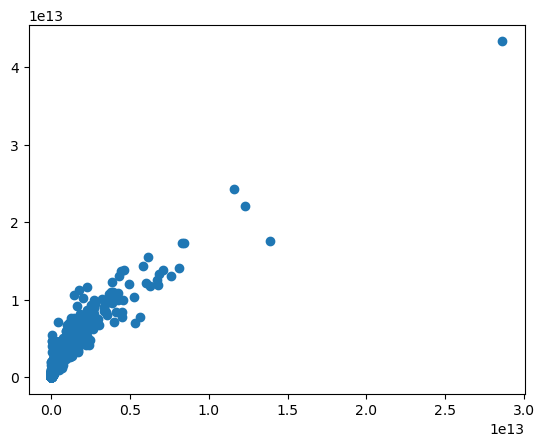

In [29]:
plt.scatter(eff_aoh_match['current_aoh_total_old'], eff_aoh_match['current_aoh_total_new'])

In [27]:
v3_old = (eff_aoh_match['current_aoh_total_old'] - eff_aoh_match['human_absent_aoh_total_old']) / eff_aoh_match['human_absent_aoh_total_old']
v3_new = (eff_aoh_match['current_aoh_total_new'] - eff_aoh_match['human_absent_aoh_total_new']) / eff_aoh_match['human_absent_aoh_total_new']

print(f'{round(v3_old.abs().median() * 100, 2)}% median decrease in AOH due to land-cover change (OLD)')
print(f'{round(v3_new.abs().median() * 100, 2)}% median decrease in AOH due to land-cover change (NEW)')

44.14% median decrease in AOH due to land-cover change (OLD)
23.81% median decrease in AOH due to land-cover change (NEW)


In [38]:
old_recreated = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/benitez_lopez2019_recreated/benitez_lopez2019_recreated_extended.csv')
new_recreated = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/benitez_lopez2019_recreated/benitez_lopez2019_recreated_extended_w_pca.csv')

In [49]:
new_recreated = new_recreated[list(old_recreated.columns)]
(old_recreated != new_recreated).sum()

Reference                     0
Study                         0
Order                         0
Family                        0
Species                       0
Species_List                  0
Longitude                     0
Latitude                      0
Response_Ratio                0
Region                        0
Country                       0
IUCN_Country_Region           0
Year                          0
GDP_Per_Capita                0
Stunting_Pct                  0
Literacy_Rate                 0
Dist_Settlement_KM            0
Travel_Time_Small             0
Travel_Time_Large             0
Protected_Area                0
Livestock_Biomass             0
Population_Density            0
Forest_Cover                  0
NPP                           0
Road_Density                  0
Percent_Settlement_50km     374
Corruption                    0
Government_Effectiveness      0
Political_Stability           0
Regulation                    0
Rule_of_Law                   0
Accounta

In [52]:
(~np.isclose(old_recreated['Percent_Settlement_50km'], new_recreated['Percent_Settlement_50km'])).sum()

0

In [288]:
import pickle
import sys

sys.path.append('..')

with open('/Users/emiliolr/Desktop/life-hunting/testing_governance/models/rf_three_part_10.0mins.pkl', 'rb') as f:
    model = pickle.load(f)

In [293]:
m = model.classifier

for j, k in zip(m.feature_names_in_, m.feature_importances_):
    print(f'{j} - {k}')

Body_Mass - 0.17497368400964755
Stunting_Pct - 0.10235317962246472
Literacy_Rate - 0.06320939853143945
Dist_Settlement_KM - 0.1369112939317324
Travel_Time_Large - 0.13616946991642226
Livestock_Biomass - 0.08392822398467693
Population_Density - 0.10106904833509432
Percent_Settlement_50km - 0.11079827750702019
Protected_Area - 0.019063097216811282
PC_0 - 0.07152432694469087


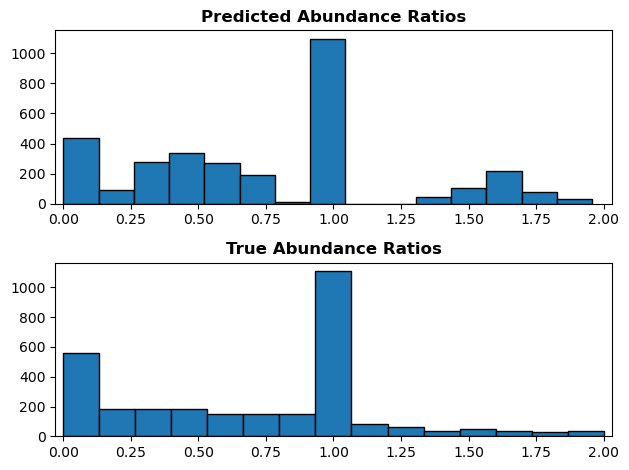

In [294]:
data = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/benitez_lopez2019_recreated/benitez_lopez2019_recreated_extended.csv')

pp_args = {'include_indicators' : True,
           'include_categorical' : False,
           'polynomial_features' : 0,
           'log_trans_cont' : False,
           'dataset' : 'mammals_recreated',
           'pca_cols' : ['Corruption', 'Government_Effectiveness', 'Political_Stability', 'Regulation', 
                         'Rule_of_Law', 'Accountability']}
pp_data = preprocess_data(data, standardize = True, **pp_args)

y_true = data['Response_Ratio']
y_pred = model.predict(pp_data, return_constit_preds = False)

fig, ax = plot_ratio_distribution_comparison(true_ratios = y_true, 
                                             pred_ratios = y_pred,
                                             upper_thresh = 2, 
                                             n_bins = 15)

In [11]:
gov_results = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/cross_val_results_all_metrics.csv')

block = 'spatial'
gov_results[(gov_results['block_type'] == block) & (~gov_results['metric'].str.contains('mean'))].sort_values(by = ['metric', 'model_name'])

,metric,mean,standard_deviation,model_name,dataset,date,num_folds,block_type,spatial_spacing,group_col
20,balanced_accuracy_DI-0.05,0.276421,0.051198,pymer_hurdle_wo_rfx_tune-thresh,mammals_recreated,2025-08-26 16:50:27,5,spatial,5.0,NaN
50,balanced_accuracy_DI-0.05,0.265135,0.009706,rf-gov_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-26 15:48:53,5,spatial,5.0,NaN
80,balanced_accuracy_DI-0.05,0.289212,0.009382,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
110,balanced_accuracy_DI-0.05,0.276474,0.013185,rf_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 14:31:04,5,spatial,5.0,NaN
28,balanced_accuracy_local_extirpation,0.546302,0.077833,pymer_hurdle_wo_rfx_tune-thresh,mammals_recreated,2025-08-26 16:50:27,5,spatial,5.0,NaN
58,balanced_accuracy_local_extirpation,0.538421,0.017287,rf-gov_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-26 15:48:53,5,spatial,5.0,NaN
88,balanced_accuracy_local_extirpation,0.572737,0.047732,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
118,balanced_accuracy_local_extirpation,0.555346,0.031719,rf_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 14:31:04,5,spatial,5.0,NaN
24,median_absolute_error-1,0.302949,0.057598,pymer_hurdle_wo_rfx_tune-thresh,mammals_recreated,2025-08-26 16:50:27,5,spatial,5.0,NaN
54,median_absolute_error-1,0.302081,0.019670,rf-gov_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-26 15:48:53,5,spatial,5.0,NaN


In [312]:
ben_lop = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/benitez_lopez2019_recreated/benitez_lopez2019_recreated_extended.csv')
m = (ben_lop['Body_Mass'] < 1000)

(ben_lop[m]['Response_Ratio'] >= 1).sum()

242

In [315]:
def bm_cats(bm):
    if bm < 0.1:
        return 'very small'
    elif (bm >= 0.1) and (bm < 1):
        return 'small'
    elif (bm >= 1) and (bm < 10):
        return 'medium'
    else:
        return 'large'

ben_lop['bm'] = (ben_lop['Body_Mass'] / 1000).apply(bm_cats)

In [349]:
r = ben_lop['Response_Ratio']
r[(r < 1)].median()

0.313119204443923

In [426]:
ben_lop[ben_lop['bm'] == 'very small']['Response_Ratio'].quantile(q = [0.1, 0.25, 0.5, 0.75, 0.9])

0.10    1.000000
0.25    1.000000
0.50    1.491803
0.75    3.958232
0.90    8.685322
Name: Response_Ratio, dtype: float64

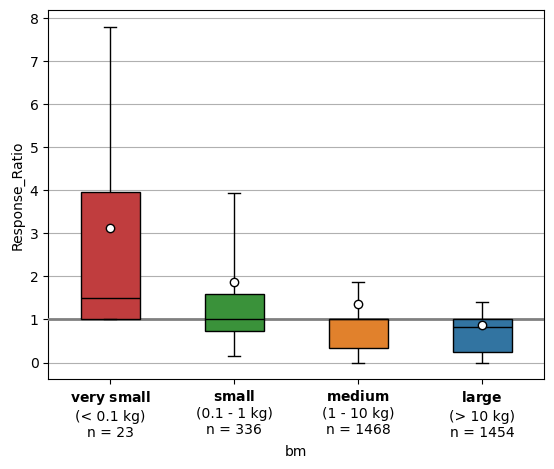

In [427]:
bm_cat_order = ['very small', 'small', 'medium', 'large']
cat_counts = ben_lop['bm'].value_counts()

sns.boxplot(x = 'bm', y = 'Response_Ratio', hue = 'bm', data = ben_lop, showfliers = False, whis = (10, 90), order = bm_cat_order, 
            width = 0.6, gap = 0.2, capwidths = 0.1, notch = False, linecolor = 'black', showmeans = True, 
            meanprops = {'markeredgecolor' : 'black', 'marker' : 'o', 'markerfacecolor' : 'white'}, zorder = 100)

plt.axhline(1, color = 'grey', linewidth = 2, zorder = 10)
plt.grid(visible = True, which = 'major', axis = 'y')

xtick_labels = [r'$\bf{very\ small}$' + f'\n(< 0.1 kg)\nn = {cat_counts.loc["very small"]}', 
                r'$\bf{small}$' + f'\n(0.1 - 1 kg)\nn = {cat_counts.loc["small"]}', 
                r'$\bf{medium}$' + f'\n(1 - 10 kg)\nn = {cat_counts.loc["medium"]}',
                r'$\bf{large}$' + f'\n(> 10 kg)\nn = {cat_counts.loc["large"]}']
plt.xticks(ticks = [0, 1, 2, 3], labels = xtick_labels)

plt.show()

In [422]:
(cat_counts['very small'] + cat_counts['small']) / cat_counts.sum()

0.10941786040841207

In [321]:
ben_lop.groupby('bm')['Response_Ratio'].quantile(q = [0.1, 0.25, 0.5, 0.75, 0.9])

bm              
large       0.10    0.000000
            0.25    0.250000
            0.50    0.823299
            0.75    1.000000
            0.90    1.398994
medium      0.10    0.000000
            0.25    0.334734
            0.50    1.000000
            0.75    1.000000
            0.90    1.868905
small       0.10    0.141102
            0.25    0.724733
            0.50    1.000000
            0.75    1.602550
            0.90    3.986828
very small  0.10    1.000000
            0.25    1.000000
            0.50    1.491803
            0.75    3.958232
            0.90    8.685322
Name: Response_Ratio, dtype: float64

0.9103931728131667


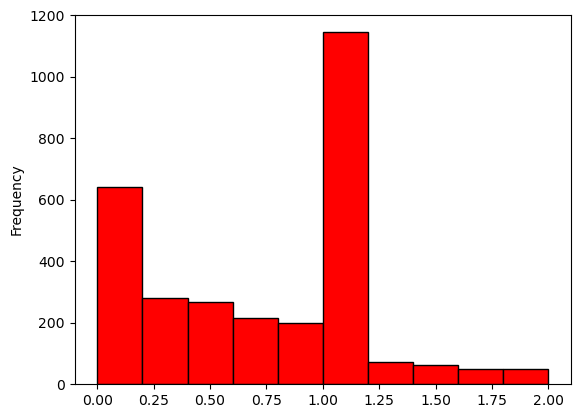

In [81]:
thresh = 2
print((ben_lop['Response_Ratio'] <= thresh).sum() / len(ben_lop))
ben_lop['Response_Ratio'][ben_lop['Response_Ratio'] <= thresh].plot.hist(color = 'red', edgecolor = 'black', bins = 10);

In [86]:
from custom_metrics import get_DI_cats

ben_lop['di_cat'] = get_DI_cats(ben_lop['Response_Ratio'], neighborhood = 0.1)

for s in ben_lop['Study'].value_counts().index.to_list():
    sub = ben_lop[ben_lop['Study'] == s]['di_cat'].value_counts()
    # print(sub)
    # print()

In [132]:
# for s in ben_lop['Study'].value_counts().index.to_list():
#     sub = ben_lop[ben_lop['Study'] == s]['Species'].value_counts()
#     print(sub)
#     print()

lens = []
for s in ben_lop['Species'].value_counts().index.to_list():
    sub = ben_lop[ben_lop['Species'] == s]['Study'].value_counts()
    lens.append(len(sub))

np.median(lens)

2.0

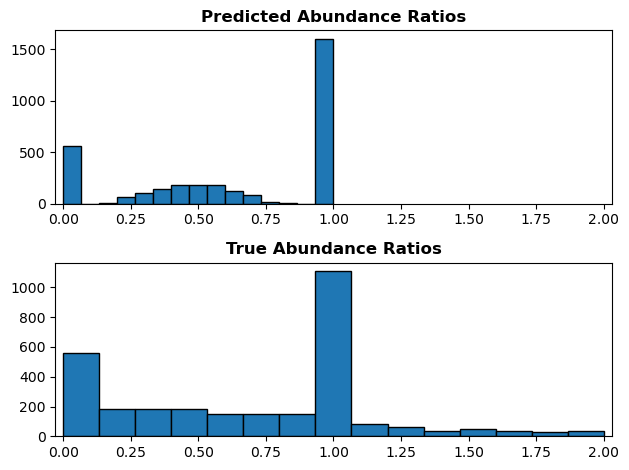

In [391]:
from plotting_utils import plot_ratio_distribution_comparison

raw = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/raw_predictions/rf-no-increase_three_part_2.0mins_rebalance-classes_no-neighborhood_mammals_recreated_5-fold_random-blocking.csv')
# raw = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/raw_predictions/rf-pca_hurdle_1.0mins_rebalance-classes_mammals_recreated_5-fold_random-blocking.csv')

fig, ax = plot_ratio_distribution_comparison(true_ratios = raw['actual'], 
                                             pred_ratios = raw['predicted'],
                                             upper_thresh = 2, 
                                             n_bins = 15)


# m = (raw['actual'] <= 2)
# actual = raw['actual'][m]
# pred = raw['predicted'][m]

# plt.hist(actual, color = 'grey', alpha = 0.6, edgecolor = None)
# plt.hist(pred, color = 'maroon', alpha = 0.6, edgecolor = None)


# plt.show()

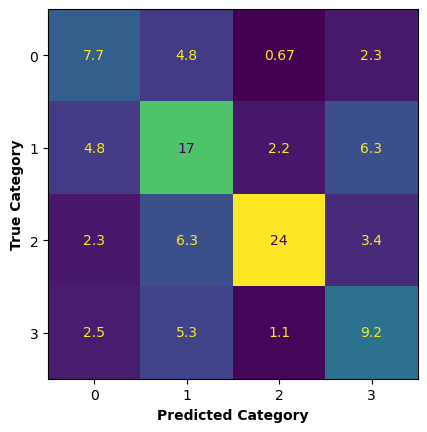

In [392]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cat_encoding = {'extirpated' : 0, 'decrease' : 1, 'no change' : 2, 'increase' : 3}
cats = pd.Series(get_DI_cats(raw['actual'], neighborhood = 0.1)).apply(lambda x: cat_encoding[x])

cm = confusion_matrix(cats, raw['predicted_class'], labels = [0, 1, 2, 3])
cm = (cm / len(cats)) * 100
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot(colorbar = False)

plt.ylabel('True Category', weight = 'bold')
plt.xlabel('Predicted Category', weight = 'bold')

plt.show()

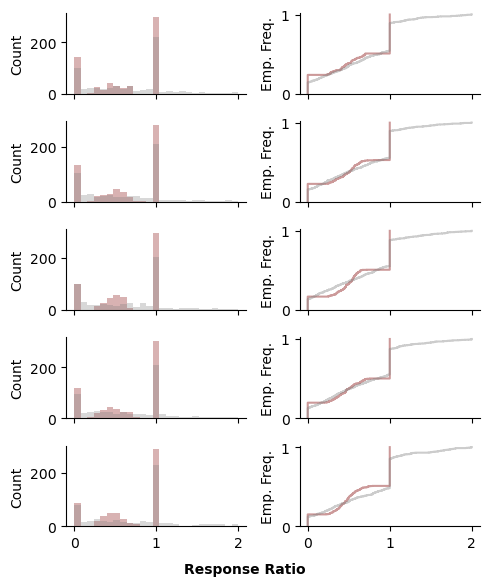

In [394]:
# Looking at histograms/eCDFs of actual/predicted per fold and corresponding Wasserstein distance
max_val = 2
raw_preds = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/raw_predictions/rf-no-increase_three_part_2.0mins_rebalance-classes_mammals_recreated_5-fold_random-blocking.csv')
wds = []

fig, axs = plt.subplots(5, 2, figsize = (5, 6), sharex = True)

for fold in range(0, 5):
    d = raw_preds[raw_preds['fold'] == fold]
    d = d[(d['actual'] <= max_val) & (d['actual'] >= 0)]

    #  histogram
    sns.histplot(data = d, x = 'predicted', stat = 'count', kde = False, legend = False, bins = 25, 
                 color = 'maroon', zorder = 100, alpha = 0.3, ec = None, binrange = (0, max_val), ax = axs[fold, 0])
    sns.histplot(data = d, x = 'actual', stat = 'count', kde = False, legend = False, bins = 25, 
                 color = 'grey', zorder = 100, alpha = 0.3, ec = None, binrange = (0, max_val), ax = axs[fold, 0])

    axs[fold, 0].spines['top'].set_visible(False)
    axs[fold, 0].spines['right'].set_visible(False)

    axs[fold, 0].set_xlim(-0.1, max_val + 0.1)

    axs[fold, 0].set_ylabel('Count')

    #  eCDF
    axs[fold, 1].ecdf(d['predicted'], color = 'maroon', alpha = 0.4)
    axs[fold, 1].ecdf(d['actual'], color = 'grey', alpha = 0.4)

    axs[fold, 1].spines['top'].set_visible(False)
    axs[fold, 1].spines['right'].set_visible(False)

    axs[fold, 1].set_ylim(0, 1 + 0.02)
    
    axs[fold, 1].set_ylabel('Emp. Freq.')

    #  labeling
    axs[fold, 0].set_xlabel(None)

fig.supxlabel('Response Ratio', y = 0.03, size = 10, weight = "bold")

fig.tight_layout()
plt.show()

In [88]:
from custom_metrics import get_DI_cats

rr_cats = get_DI_cats(raw['actual'], neighborhood = 0)
pd.Series(rr_cats).value_counts() / len(rr_cats)

decrease      0.365133
no change     0.310881
increase      0.199634
extirpated    0.124352
Name: count, dtype: float64

-22.53119130092179


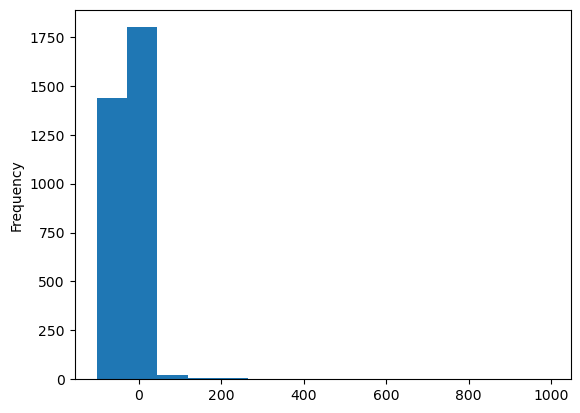

In [138]:
d = pd.read_csv('/Users/emiliolr/Desktop/checking_aoh_diffs.csv')
d = d[d['aoh_hum_abs'] != 0] 

delta = (d['aoh_cur'] - d['aoh_hum_abs']) / d['aoh_hum_abs']
delta = delta[delta < 10] * 100

print(delta.median())

delta.plot.hist(bins = 15)
plt.show()